# Training a Model

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Load Data

In [2]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

## Create Model

In [4]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = NeuralNet()
net

NeuralNet(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

## Loss and Optimizer

In [5]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Train Model

In [7]:
n_epochs = 3

# Training epochs
for epoch in range(n_epochs):
    # Iterate over data_loader - batches
    for data in trainset:
        X, y = data
        # set gradients to 0 before loss calc.
        net.zero_grad()
        # reshape batch
        output = net(X.view(-1,784))
        # compute loss
        loss = F.nll_loss(output, y)
        # backprop
        loss.backward()
        # update weighs
        optimizer.step()
    print('Loss (epoch %d of %d): %f' % (epoch+1, n_epochs, loss))  

Loss (epoch 0 of 3): 0.099895
Loss (epoch 1 of 3): 0.013831
Loss (epoch 2 of 3): 0.099567


## Inference

In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.972


## Plot Image

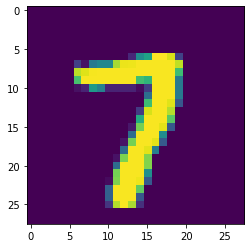

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [14]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784)
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-3.4666e+01, -1.3119e+01, -1.4062e+01, -1.3365e+01, -2.3421e+01,
        -2.9156e+01, -4.9355e+01, -4.7684e-06, -1.8366e+01, -1.4685e+01],
       grad_fn=<SelectBackward>)
